In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
%matplotlib inline
import astropy
import astroquery
from astropy.io import ascii
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
import os
from astropy.coordinates import SkyCoord, Galactic
from matplotlib.colors import LogNorm
from scipy.stats import lognorm
import scipy.stats

# formatting to make plots look nice

m.rc('xtick', direction='in', top=True)
m.rc('ytick', direction='in', right=True)
m.rc('xtick.minor', visible=True)
m.rc('ytick.minor', visible=True)

In [2]:
exo_data = ascii.read('exoplanet_data.csv')

# before we give the students the data, we should probably simplify it so that we aren't looking at unconfirmed objects
exo_data = exo_data[exo_data['koi_disposition'] == 'CONFIRMED']

# The Abundance of Earths ("$\eta_{earth}$")

Eta-earth is fraction of earth-like planets orbiting sun-like stars that we find in the universe. In order to determine this fraction, we first have to define what we mean by "earth-like" planets and "sun-like" stars. We know some basic properties of the sun and earth that we can expand in order to create these definitions. 

In [3]:
# defining potential sun-like stars
# We'll take all stars in the temperature ranges of K, G, and F stars

kgf_stars = (exo_data['koi_steff'] >= 3500) & (exo_data['koi_steff'] <= 7400)

In [4]:
# For a planet to be earth-like, it needs to be rocky. In order to be rocky, 
# a planet has to be between 0.5 and 2.5 earth radii, so we'll make that our first "earth-like" cut

planet_rad = (exo_data['koi_prad'] >= 0.5) & (exo_data['koi_prad'] <= 2.5)

# Next, we should look at orbital period. We know that earth's orbital period is 365,
# so next we'll limit our earth-like criteria to planets with orbital periods between 1 and 400 days.

planet_period = (exo_data['koi_period'] >= 1) & (exo_data['koi_period'] <= 400)

# Equilibrium temperature is also important to look at. Earth's equilibrium temperature 
# lies at 255 K (about -1 degree F). We'll define our equilibrium temperature criteria as 200-300 K.

planet_teq = (exo_data['koi_teq'] >= 200) & (exo_data['koi_teq'] <= 300)

In [5]:
# Now we can combine all of these to make our final earth-like cuts.

earth_like = np.logical_and(planet_rad, planet_period)
earth_like = np.logical_and(earth_like, planet_teq)

In [6]:
# The probability of detecting an earth-like planet around a sun-like star
# is given by stellar radius / semi-major axis
# First we'll convert stellar radius from solar radii to AU

srad_au = exo_data['koi_srad'] * 0.00465047 
sma_au = exo_data['koi_sma']

vis_prob = srad_au / sma_au

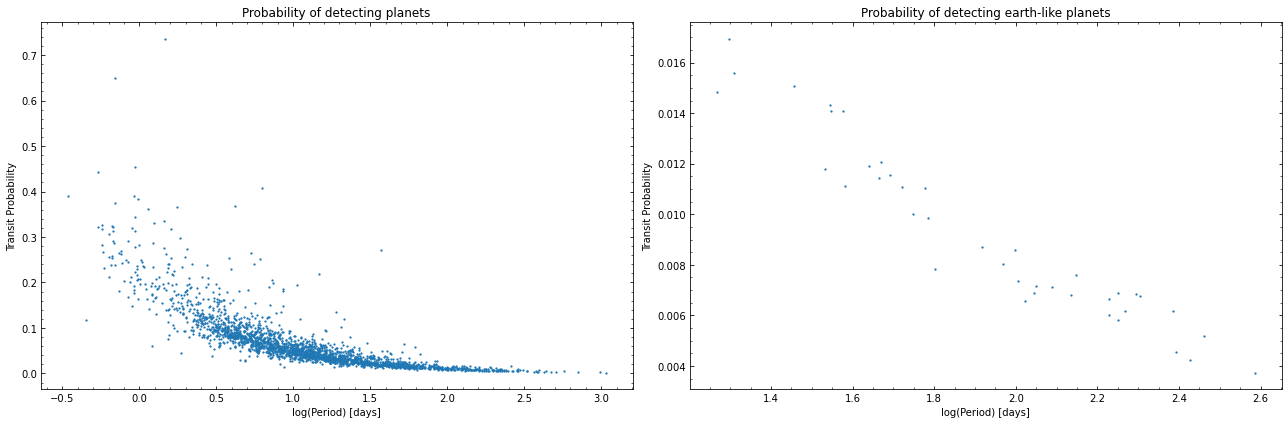

In [7]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
ax1.scatter(np.log10(exo_data['koi_period']), vis_prob, s = 1.5)
ax1.set_title('Probability of detecting planets')
ax2.scatter(np.log10(exo_data['koi_period'][earth_like]), vis_prob[earth_like], s = 1.5)
ax2.set_title('Probability of detecting earth-like planets')

for subplot in [ax1, ax2]:
    subplot.set_xlabel('log(Period) [days]')
    subplot.set_ylabel('Transit Probability')
    
fig1.tight_layout()

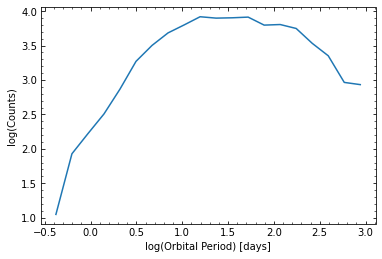

In [11]:
all_sum = scipy.stats.binned_statistic(np.log10(exo_data['koi_period']), 1/vis_prob ,statistic='sum',bins = 20)
all_bins = all_sum[1]
all_bin_centers = 0.5*(all_bins[1:] + all_bins[:-1])
plt.plot(all_bin_centers,np.log10(all_sum[0]))
plt.xlabel('log(Orbital Period) [days]')
plt.ylabel('log(Counts)');


In [9]:
earth = np.sum(1/vis_prob[earth_like])
sun = len(exo_data['kepid'][kgf_stars])
eta_earth = earth / sun
print(earth, sun)

5012.451388605114 2333


In [10]:
print(eta_earth)

2.1485003808851753
